In [ ]:
# ----Based on the results of sentiment analysis, get a list of voldemort's enemies
# ----deal with outliers
# ----filter the dataframe to only include the interactions among the characters in the list of voldemort's enemies
# ----created direct graph using this dataframe and calculate the degree centrality analysis based on this graph:

#  character who has higher score means he contributes more being the enemy of voldemort
#  find that the degree centrality score is the same for weighted and unweighted direct graph

In [1]:
import networkx as nx
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
#result of sentiment analysis

In [2]:
# 21/3/Teams Chat
voldemort_enemies = ['Voldemort', 'Tom Riddle', 'Fred Weasley', 'Percy Weasley', 'Mrs. Cole', 'Cornelius Fudge', 'Elphias Doge', 'Harry Potter', 'Minerva McGonagall', 'Lucius Malfoy', 'Severus Snape', 'Bellatrix Lestrange', 'Moaning Myrtle', 'Sirius Black', 'Peter Pettigrew', 'Garrick Ollivander', 'Filius Flitwick', 'Stanley Shunpike', 'Horace Slughorn', 'Neville Longbottom', 'Remus Lupin', 'Rubeus Hagrid', 'George Weasley', 'Albus Dumbledore', 'Hermione Granger', 'Ron Weasley']

In [13]:
# 21/3/Teams Chat
voldemort_supporters = ['Dobby', 'Voldemort', 'Tom Riddle', 'Fred Weasley', 'Mrs. Cole', 'Gellert Grindelwald', 'Arthur Weasley', 'Harry Potter', 'Ginny Weasley', 'Corban Yaxley', 'Lucius Malfoy', 'Severus Snape', 'Bellatrix Lestrange', 'Quirinus Quirrell', 'Sirius Black', 'Peter Pettigrew', 'Narcissa Malfoy', 'Mykew Gregorovitch', 'Horace Slughorn', 'Cedric Diggory', 'Barty Crouch Jr.', 'Pansy Parkinson', 'Remus Lupin', 'Xenophilius Lovegood', 'Pius Thicknesse', 'Rubeus Hagrid', 'Albus Dumbledore', 'Hermione Granger', 'Diary', 'Ron Weasley']

In [3]:
# Read the data from the third sheet of your Excel file into a DataFrame
df = pd.read_excel("cleaned_data.xlsx", sheet_name = 'dialogue')
df

,Unnamed: 0,Movie ID,Node_X,Node_Y,Dialogue,Node_pair
0,0,1,Albus Dumbledore,Minerva McGonagall,I should have known that you would be here...P...,"Albus Dumbledore,Minerva McGonagall"
1,1,1,Minerva McGonagall,Albus Dumbledore,"Good evening, Professor Dumbledore. Are the ru...","Minerva McGonagall,Albus Dumbledore"
2,2,1,Albus Dumbledore,Minerva McGonagall,"I'm afraid so, Professor. The good, and the bad.","Albus Dumbledore,Minerva McGonagall"
3,3,1,Minerva McGonagall,Albus Dumbledore,And the boy?,"Minerva McGonagall,Albus Dumbledore"
4,4,1,Albus Dumbledore,Minerva McGonagall,Hagrid is bringing him.,"Albus Dumbledore,Minerva McGonagall"
...,...,...,...,...,...,...
6566,7631,8,Harry Potter,Albus Potter,Then Slytherin House will have gained a wonder...,"Harry Potter,Albus Potter"
6567,7632,8,Albus Potter,Harry Potter,Really?,"Albus Potter,Harry Potter"
6568,7633,8,Harry Potter,Albus Potter,Really.,"Harry Potter,Albus Potter"
6569,7634,8,Harry Potter,Albus Potter,Ready?,"Harry Potter,Albus Potter"


In [ ]:
# degree centrality analysis of voldemort_enemies(weighted)

In [4]:
# Read the data from the third sheet of your Excel file into a DataFrame
df_sheet3 = pd.read_excel("cleaned_data.xlsx", sheet_name = 'graph_all_movie')
df_sheet3

,Unnamed: 0,Node_X,Node_Y,weight
0,0,Aberforth Dumbledore,Harry Potter,16
1,1,Aberforth Dumbledore,Hermione Granger,2
2,2,Alastor Moody,Albus Dumbledore,8
3,3,Alastor Moody,Barty Crouch Sr.,2
4,4,Alastor Moody,Cornelius Fudge,1
...,...,...,...,...
821,821,Witch,Hermione Granger,2
822,822,Wizard,Harry Potter,4
823,823,Xenophilius Lovegood,Harry Potter,12
824,824,Xenophilius Lovegood,Hermione Granger,1


In [8]:
# Filter the dataframe to include interactions and subinteractions involving Voldemort and his enemies
voldemort_enemies_interactions = df_sheet3[ (df_sheet3["Node_X"].isin(voldemort_enemies)) & (df_sheet3["Node_Y"].isin(voldemort_enemies)) ]
voldemort_enemies_interactions

,Unnamed: 0,Node_X,Node_Y,weight
20,20,Albus Dumbledore,Bellatrix Lestrange,1
22,22,Albus Dumbledore,Cornelius Fudge,35
27,27,Albus Dumbledore,Filius Flitwick,1
29,29,Albus Dumbledore,Harry Potter,212
30,30,Albus Dumbledore,Hermione Granger,3
...,...,...,...,...
808,808,Voldemort,Neville Longbottom,2
809,809,Voldemort,Peter Pettigrew,12
812,812,Voldemort,Ron Weasley,3
813,813,Voldemort,Severus Snape,13


In [9]:
# Visualization of results
G_V_E = nx.from_pandas_edgelist(voldemort_enemies_interactions, 'Node_X', 'Node_Y', edge_attr='weight', create_using=nx.DiGraph())

In [10]:
# calculate degree centrality
degree_centrality_in = nx.in_degree_centrality(G_V_E)
degree_centrality_out = nx.out_degree_centrality(G_V_E)

# Convert dictionaries to DataFrames
df_v_e_in = pd.DataFrame.from_dict(degree_centrality_in, orient="index", columns=["Degree Centrality In"]).round(7)
df_v_e_out= pd.DataFrame.from_dict(degree_centrality_out, orient="index", columns=["Degree Centrality Out"]).round(7)

# Merge the two DataFrames on their shared index
df_v_e = pd.merge(df_v_e_in, df_v_e_out, left_index=True, right_index=True)
df_v_e['Total Degree Centrality'] = df_v_e['Degree Centrality In'] + df_v_e['Degree Centrality Out']
df_v_e = df_v_e.sort_values(by='Total Degree Centrality', ascending=False)

df_v_e

,Degree Centrality In,Degree Centrality Out,Total Degree Centrality
Harry Potter,0.96,0.96,1.92
Ron Weasley,0.68,0.68,1.36
Albus Dumbledore,0.60,0.60,1.20
Hermione Granger,0.60,0.56,1.16
Voldemort,0.36,0.36,0.72
Rubeus Hagrid,0.36,0.36,0.72
Severus Snape,0.40,0.32,0.72
Bellatrix Lestrange,0.32,0.32,0.64
Sirius Black,0.28,0.36,0.64
Lucius Malfoy,0.32,0.28,0.60


In [11]:
# export the dataframe to a CSV file
df_v_e.to_csv('df_v_e.csv', index=False)

<IPython.core.display.Javascript object>


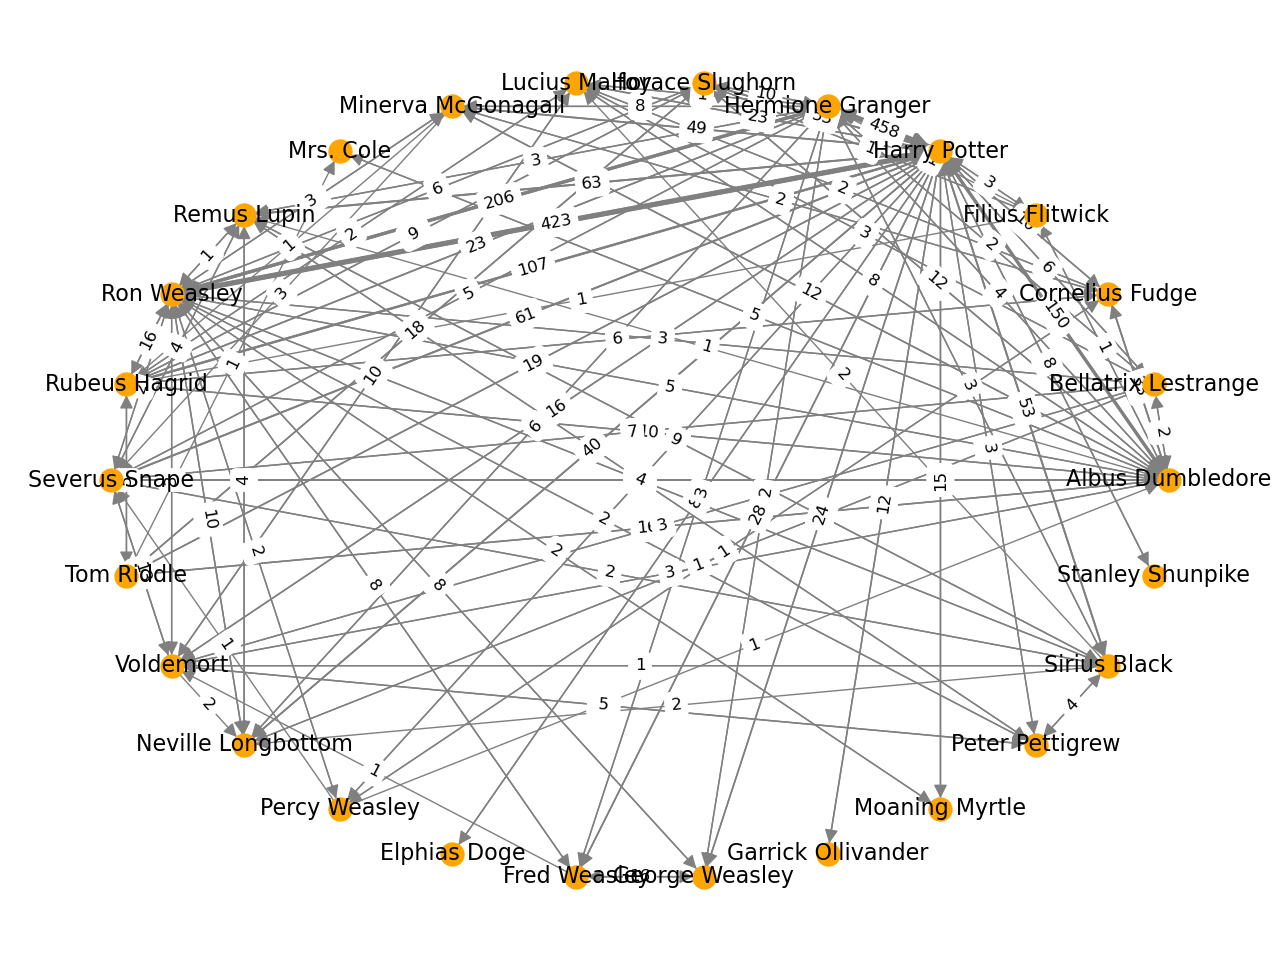

In [12]:
%matplotlib notebook

pos = nx.circular_layout(G_V_E)

# Set the minimum width for edges
min_width = 0.5

# Draw the graph with edge weights and adjusted layout
edge_weights = nx.get_edge_attributes(G_V_E, 'weight')
nx.draw(G_V_E, pos=pos, with_labels=True, node_size=60, font_size=8, node_color='orange', edge_color='grey', width=[min_width + (2 - min_width) * (d['weight'] / max(edge_weights.values())) for (u,v,d) in G_V_E.edges(data=True)],
        edge_cmap=plt.cm.Blues, edge_vmin=0.0, edge_vmax=max(edge_weights.values()))
nx.draw_networkx_edge_labels(G_V_E, pos=pos, edge_labels=edge_weights, font_size=6, font_color='black')

# Show the plot
plt.show()



In [ ]:
# degree centrality analysis of voldemort_supporters(weighted)

In [14]:
# Filter the dataframe to include interactions and subinteractions involving Voldemort and his enemies
voldemort_supporters_interactions = df_sheet3[ (df_sheet3["Node_X"].isin(voldemort_supporters)) & (df_sheet3["Node_Y"].isin(voldemort_supporters)) ]
voldemort_supporters_interactions

,Unnamed: 0,Node_X,Node_Y,weight
18,18,Albus Dumbledore,Barty Crouch Jr.,2
20,20,Albus Dumbledore,Bellatrix Lestrange,1
21,21,Albus Dumbledore,Cedric Diggory,1
29,29,Albus Dumbledore,Harry Potter,212
30,30,Albus Dumbledore,Hermione Granger,3
...,...,...,...,...
812,812,Voldemort,Ron Weasley,3
813,813,Voldemort,Severus Snape,13
814,814,Voldemort,Sirius Black,3
823,823,Xenophilius Lovegood,Harry Potter,12


In [15]:
# Visualization of results
G_V_S = nx.from_pandas_edgelist(voldemort_supporters_interactions, 'Node_X', 'Node_Y', edge_attr='weight', create_using=nx.DiGraph())

In [16]:
# calculate degree centrality
degree_centrality_in = nx.in_degree_centrality(G_V_S)
degree_centrality_out = nx.out_degree_centrality(G_V_S)

# Convert dictionaries to DataFrames
df_v_s_in = pd.DataFrame.from_dict(degree_centrality_in, orient="index", columns=["Degree Centrality In"])
df_v_s_out= pd.DataFrame.from_dict(degree_centrality_out, orient="index", columns=["Degree Centrality Out"])

# Merge the two DataFrames on their shared index
df_v_s = pd.merge(df_v_s_in, df_v_s_out, left_index=True, right_index=True)
df_v_s['Total Degree Centrality'] = df_v_s['Degree Centrality In'] + df_v_s['Degree Centrality Out']
df_v_s = df_v_s.sort_values(by='Total Degree Centrality', ascending=False)

df_v_s

,Degree Centrality In,Degree Centrality Out,Total Degree Centrality
Harry Potter,0.758621,0.758621,1.517241
Voldemort,0.620690,0.517241,1.137931
Ron Weasley,0.551724,0.586207,1.137931
Hermione Granger,0.517241,0.482759,1.000000
Albus Dumbledore,0.413793,0.482759,0.896552
Severus Snape,0.344828,0.344828,0.689655
Bellatrix Lestrange,0.310345,0.310345,0.620690
Sirius Black,0.275862,0.310345,0.586207
Lucius Malfoy,0.275862,0.275862,0.551724
Remus Lupin,0.310345,0.206897,0.517241


In [17]:
# export the dataframe to a CSV file
df_v_s.to_csv('df_v_s.csv', index=False)

<IPython.core.display.Javascript object>


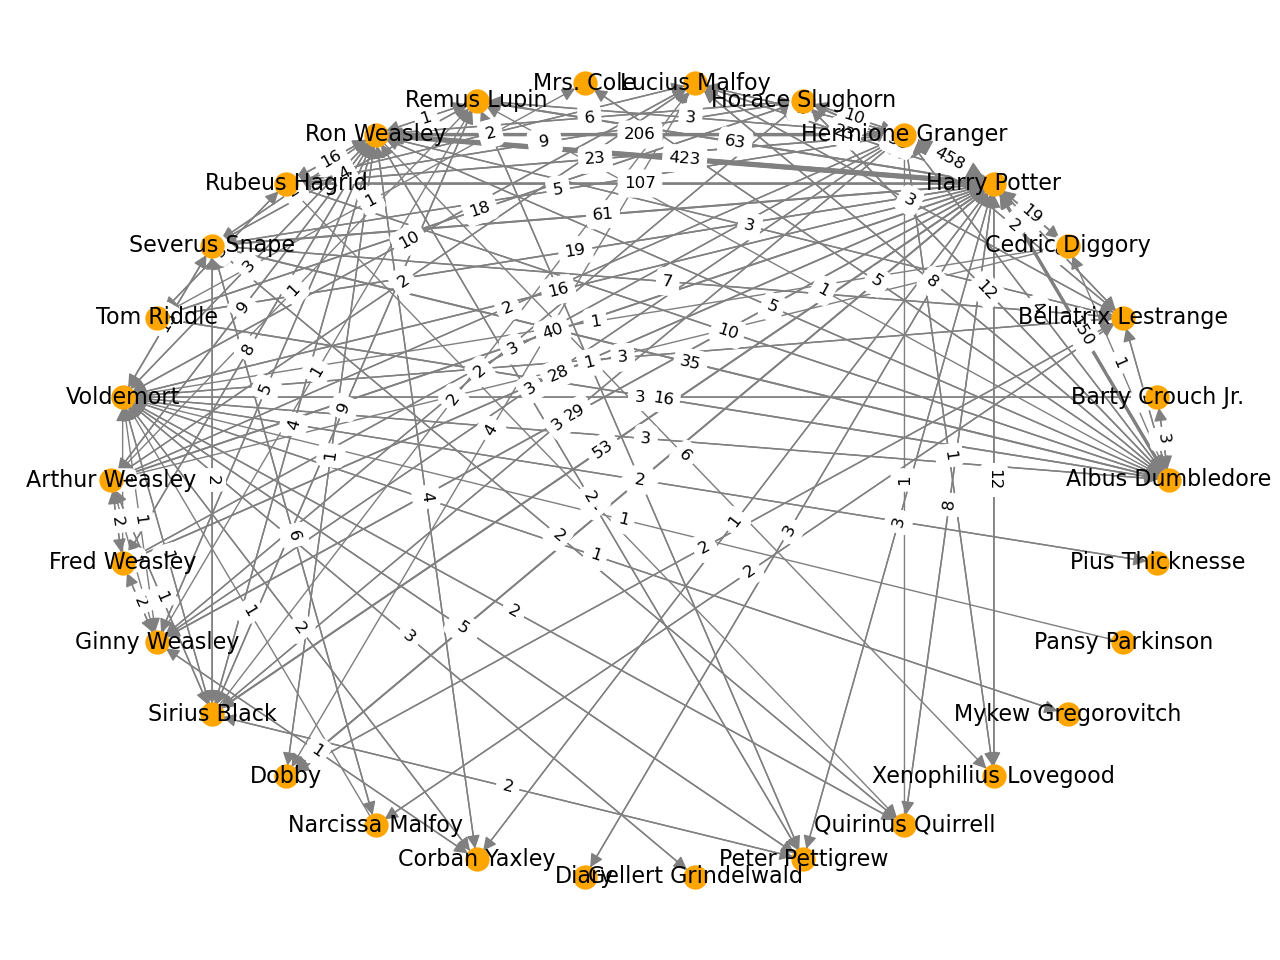

In [18]:
%matplotlib notebook

pos = nx.circular_layout(G_V_S)

# Set the minimum width for edges
min_width = 0.5

# Draw the graph with edge weights and adjusted layout
edge_weights = nx.get_edge_attributes(G_V_S, 'weight')
nx.draw(G_V_S, pos=pos, with_labels=True, node_size=60, font_size=8, node_color='orange', edge_color='grey', width=[min_width + (2 - min_width) * (d['weight'] / max(edge_weights.values())) for (u,v,d) in G_V_S.edges(data=True)],
        edge_cmap=plt.cm.Blues, edge_vmin=0.0, edge_vmax=max(edge_weights.values()))
nx.draw_networkx_edge_labels(G_V_S, pos=pos, edge_labels=edge_weights, font_size=6, font_color='black')

# Show the plot
plt.show()


